<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-11.-Interfaces:-From-Protocols-to-ABCs" data-toc-modified-id="Chapter-11.-Interfaces:-From-Protocols-to-ABCs-1">Chapter 11. Interfaces: From Protocols to ABCs</a></span><ul class="toc-item"><li><span><a href="#Subclassing-ABCs" data-toc-modified-id="Subclassing-ABCs-1.1">Subclassing ABCs</a></span></li><li><span><a href="#ABCs-in-the-Standard-Library-(collections.abc)" data-toc-modified-id="ABCs-in-the-Standard-Library-(collections.abc)-1.2">ABCs in the Standard Library (collections.abc)</a></span><ul class="toc-item"><li><span><a href="#Iterable,-Container,-and-Sized" data-toc-modified-id="Iterable,-Container,-and-Sized-1.2.1">Iterable, Container, and Sized</a></span></li><li><span><a href="#Sequence,-Mapping,-and-Set" data-toc-modified-id="Sequence,-Mapping,-and-Set-1.2.2">Sequence, Mapping, and Set</a></span></li><li><span><a href="#MappingView" data-toc-modified-id="MappingView-1.2.3">MappingView</a></span></li><li><span><a href="#Callable-and-Hashable" data-toc-modified-id="Callable-and-Hashable-1.2.4">Callable and Hashable</a></span></li></ul></li><li><span><a href="#The-numbers-package" data-toc-modified-id="The-numbers-package-1.3">The numbers package</a></span><ul class="toc-item"><li><span><a href="#Part-of-the-Exception-class-hierarchy" data-toc-modified-id="Part-of-the-Exception-class-hierarchy-1.3.1">Part of the Exception class hierarchy</a></span></li></ul></li><li><span><a href="#Virtual-Subclasses---using-the-register-decorator" data-toc-modified-id="Virtual-Subclasses---using-the-register-decorator-1.4">Virtual Subclasses - using the register decorator</a></span></li></ul></li></ul></div>

# Chapter 11. Interfaces: From Protocols to ABCs
(Immutable) sequences in python are treated specially because iteration is implicit in all objects even if `__iter__` is not implemented as long as `__getitem__` is implemented.

Iteration in Python represents an extreme form of duck typing: the interpreter tries two different methods to iterate over objects.

In [394]:
class Foo:
     def __init__(self):
        self._seq = list(range(0, 30, 10))
     
     def __getitem__(self, pos):
        return self._seq[pos]
        
f = Foo()

In [395]:
for i in f: print(i)

0
10
20


In [384]:
10 in f

True

The default sequence interface does not however support mutability

In [385]:
f[1] = 100

TypeError: 'Foo' object does not support item assignment

This can be fixed by monkey patching - changing a class or module at runtime, without touching the source code

Monkey patching is powerful, but the code that does the actual patching is very tightly coupled with the program to be patched, often handling private and undocumented parts.


In [396]:
def set_by_pos(self, key, value): 
    self._seq[key] = value
    
Foo.__setitem__ = set_by_pos

In [398]:
f[1] = 99

In [399]:
import random
random.shuffle(f)

TypeError: object of type 'Foo' has no len()

In [400]:
def get_len(self):
    return len(self._seq)
Foo.__len__ = get_len

In [401]:
random.shuffle(f)
for i in f: print(i)

20
0
99


## Subclassing ABCs
The interpreter does not check for the implementation of the abstract methods at import time, but only at runtime when we actually try to instantiate the class

In [403]:
import collections

Card = collections.namedtuple('Card', ['rank', 'suit'])

class FrenchDeck2(collections.abc.MutableSequence):
    ranks = [str(n) for n in range(2, 11)] + list('JQKA')
    suits = 'spades diamonds clubs hearts'.split()

    def __init__(self):
        self._cards = [Card(rank, suit) for suit in self.suits
                                        for rank in self.ranks]

    def __len__(self):
        return len(self._cards)

    def __getitem__(self, position):
        return self._cards[position]

    def __setitem__(self, position, value):  # 
        self._cards[position] = value

#     def __delitem__(self, position):  # 
#         del self._cards[position]

#     def insert(self, position, value):  # 
#         self._cards.insert(position, value)

In [404]:
x = FrenchDeck2()

TypeError: Can't instantiate abstract class FrenchDeck2 with abstract methods __delitem__, insert

## ABCs in the Standard Library (collections.abc)

### Iterable, Container, and Sized
Iterable supports iteration with `__iter__`, Container supports the in operator with `__contains__`, and Sized supports len() with `__len_`

### Sequence, Mapping, and Set
These are the main immutable collection types, and each has a mutable subclass

### MappingView
.items(), .keys(), and .values() inherit from ItemsView, KeysView, and ValuesView, respectively

### Callable and Hashable
support the `insinstance` built-in as a safe way of determining whether an object is callable or hashable

## The numbers package
The numbers tower

if you need to check for an integer, use `isinstance(x, numbers.Integral)` to accept `int`, `bool` (which subclasses `int`) or other integer type

* numbers.Number
* numbers.Complex
* numbers.Real
* numbers.Rational
* numbers.Integral

An abstract method can actually have an implementation. Even if it does, subclasses will still be forced to override it, but they will be able to invoke the abstract method with super()

In [414]:
import abc

class Tombola(abc.ABC):   

# An abstract method is marked with the @abstractmethod 
# decorator, and often its body is empty except for a docstring
    @abc.abstractmethod
    def load(self, iterable):   
        """Add items from an iterable."""

    @abc.abstractmethod
    def pick(self):   
        """Remove item at random, returning it.

        This method should raise `LookupError` when the instance is empty.
        """

    def loaded(self):   
        """Return `True` if there's at least 1 item, `False` otherwise."""
        return bool(self.inspect())   


    def inspect(self):
        """Return a sorted tuple with the items currently inside."""
        items = []
        while True:   
            try:
                items.append(self.pick())
            except LookupError:
                break
        self.load(items)   
        return tuple(sorted(items))

### Part of the Exception class hierarchy
`BaseException
 ├── SystemExit
 ├── KeyboardInterrupt
 ├── GeneratorExit
 └── Exception
      ├── StopIteration
      ├── ArithmeticError
      │    ├── FloatingPointError
      │    ├── OverflowError
      │    └── ZeroDivisionError
      ├── AssertionError
      ├── AttributeError
      ├── BufferError
      ├── EOFError
      ├── ImportError
      ├── LookupError  
      │    ├── IndexError  
      │    └── KeyError  
      ├── MemoryError
      ... etc.`


In [415]:
class Fake(Tombola):
    def pick(self):
        return 13

When one or more abstract functions is not implemented in a subclass, the subclass is considered abstract and cannot be instantiated

In [416]:
f=Fake()

TypeError: Can't instantiate abstract class Fake with abstract methods load

In [417]:
import random

class BingoCage(Tombola):   

    def __init__(self, items):
        self._randomizer = random.SystemRandom()   
        self._items = []
        self.load(items)   

    def load(self, items):
        self._items.extend(items)
        self._randomizer.shuffle(self._items)   

    def pick(self):   
        try:
            return self._items.pop()
        except IndexError:
            raise LookupError('pick from empty BingoCage')

    def __call__(self):   
        self.pick()

In [418]:
class LotteryBlower(Tombola):

    def __init__(self, iterable):
#         iterable argument may be any iterable type
        self._balls = list(iterable)   

    def load(self, iterable):
        self._balls.extend(iterable)

    def pick(self):
        try:
            position = random.randrange(len(self._balls))   
        except ValueError:
            raise LookupError('pick from empty BingoCage')
        return self._balls.pop(position)   

    def loaded(self):   
        return bool(self._balls)

    def inspect(self):   
        return tuple(sorted(self._balls))


## Virtual Subclasses - using the register decorator
register a class as a virtual subclass of an ABC, even if it does not inherit from it. When doing so, we promise that the class faithfully implements the interface defined in the ABC—and Python will believe us without checking. If we lie, we’ll be caught by the usual runtime exceptions.

This is done by calling a register method on the ABC. The registered class then becomes a virtual subclass of the ABC, and will be recognized as such by functions like `issubclass` and `isinstance`, but it will not inherit any methods or attributes from the ABC

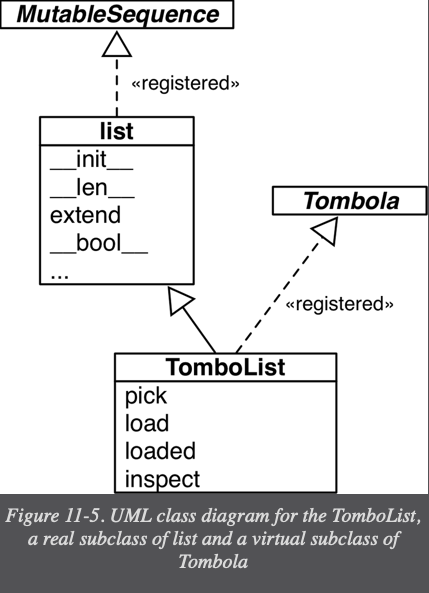

In [425]:
from IPython.display import Image
Image(filename = "virtual.png")

In [419]:
from random import randrange

# Tombolist is registered as a virtual subclass of Tombola
@Tombola.register  # 
class TomboList(list):  # 

    def pick(self):
        if self:  # 
            position = randrange(len(self))
            return self.pop(position)  # 
        else:
            raise LookupError('pop from empty TomboList')

    load = list.extend  # 

    def loaded(self):
        return bool(self)  # 

    def inspect(self):
        return tuple(sorted(self))

In [423]:
issubclass(TomboList, Tombola)

True

In [427]:
t = TomboList(range(100))
isinstance(t, Tombola)

True

`list` and `object` are the only 'real' superclasses of `TomboList`

In [432]:
TomboList.__mro__

(__main__.TomboList, list, object)

In [ ]:
# Chapter 11. Interfaces: From Protocols to ABCs
(Immutable) sequences in python are treated specially because iteration is implicit in all objects even if `__iter__` is not implemented as long as `__getitem__` is implemented.

Iteration in Python represents an extreme form of duck typing: the interpreter tries two different methods to iterate over objects.

class Foo:
     def __init__(self):
        self._seq = list(range(0, 30, 10))
     
     def __getitem__(self, pos):
        return self._seq[pos]
        
f = Foo()

for i in f: print(i)

10 in f

The default sequence interface does not however support mutability

f[1] = 100

This can be fixed by monkey patching - changing a class or module at runtime, without touching the source code

Monkey patching is powerful, but the code that does the actual patching is very tightly coupled with the program to be patched, often handling private and undocumented parts.


def set_by_pos(self, key, value): 
    self._seq[key] = value
    
Foo.__setitem__ = set_by_pos

f[1] = 99

import random
random.shuffle(f)

def get_len(self):
    return len(self._seq)
Foo.__len__ = get_len

random.shuffle(f)
for i in f: print(i)

## Subclassing ABCs
The interpreter does not check for the implementation of the abstract methods at import time, but only at runtime when we actually try to instantiate the class

import collections

Card = collections.namedtuple('Card', ['rank', 'suit'])

class FrenchDeck2(collections.abc.MutableSequence):
    ranks = [str(n) for n in range(2, 11)] + list('JQKA')
    suits = 'spades diamonds clubs hearts'.split()

    def __init__(self):
        self._cards = [Card(rank, suit) for suit in self.suits
                                        for rank in self.ranks]

    def __len__(self):
        return len(self._cards)

    def __getitem__(self, position):
        return self._cards[position]

    def __setitem__(self, position, value):  # 
        self._cards[position] = value

#     def __delitem__(self, position):  # 
#         del self._cards[position]

#     def insert(self, position, value):  # 
#         self._cards.insert(position, value)

x = FrenchDeck2()

## ABCs in the Standard Library (collections.abc)

### Iterable, Container, and Sized
Iterable supports iteration with `__iter__`, Container supports the in operator with `__contains__`, and Sized supports len() with `__len_`

### Sequence, Mapping, and Set
These are the main immutable collection types, and each has a mutable subclass

### MappingView
.items(), .keys(), and .values() inherit from ItemsView, KeysView, and ValuesView, respectively

### Callable and Hashable
support the `insinstance` built-in as a safe way of determining whether an object is callable or hashable

## The numbers package
The numbers tower

if you need to check for an integer, use `isinstance(x, numbers.Integral)` to accept `int`, `bool` (which subclasses `int`) or other integer type

* numbers.Number
* numbers.Complex
* numbers.Real
* numbers.Rational
* numbers.Integral

An abstract method can actually have an implementation. Even if it does, subclasses will still be forced to override it, but they will be able to invoke the abstract method with super()

import abc

class Tombola(abc.ABC):   

# An abstract method is marked with the @abstractmethod 
# decorator, and often its body is empty except for a docstring
    @abc.abstractmethod
    def load(self, iterable):   
        """Add items from an iterable."""

    @abc.abstractmethod
    def pick(self):   
        """Remove item at random, returning it.

        This method should raise `LookupError` when the instance is empty.
        """

    def loaded(self):   
        """Return `True` if there's at least 1 item, `False` otherwise."""
        return bool(self.inspect())   


    def inspect(self):
        """Return a sorted tuple with the items currently inside."""
        items = []
        while True:   
            try:
                items.append(self.pick())
            except LookupError:
                break
        self.load(items)   
        return tuple(sorted(items))

### Part of the Exception class hierarchy
`BaseException
 ├── SystemExit
 ├── KeyboardInterrupt
 ├── GeneratorExit
 └── Exception
      ├── StopIteration
      ├── ArithmeticError
      │    ├── FloatingPointError
      │    ├── OverflowError
      │    └── ZeroDivisionError
      ├── AssertionError
      ├── AttributeError
      ├── BufferError
      ├── EOFError
      ├── ImportError
      ├── LookupError  
      │    ├── IndexError  
      │    └── KeyError  
      ├── MemoryError
      ... etc.`


class Fake(Tombola):
    def pick(self):
        return 13

When one or more abstract functions is not implemented in a subclass, the subclass is considered abstract and cannot be instantiated

f=Fake()

import random

class BingoCage(Tombola):   

    def __init__(self, items):
        self._randomizer = random.SystemRandom()   
        self._items = []
        self.load(items)   

    def load(self, items):
        self._items.extend(items)
        self._randomizer.shuffle(self._items)   

    def pick(self):   
        try:
            return self._items.pop()
        except IndexError:
            raise LookupError('pick from empty BingoCage')

    def __call__(self):   
        self.pick()

class LotteryBlower(Tombola):

    def __init__(self, iterable):
#         iterable argument may be any iterable type
        self._balls = list(iterable)   

    def load(self, iterable):
        self._balls.extend(iterable)

    def pick(self):
        try:
            position = random.randrange(len(self._balls))   
        except ValueError:
            raise LookupError('pick from empty BingoCage')
        return self._balls.pop(position)   

    def loaded(self):   
        return bool(self._balls)

    def inspect(self):   
        return tuple(sorted(self._balls))


## Virtual Subclasses - using the register decorator
register a class as a virtual subclass of an ABC, even if it does not inherit from it. When doing so, we promise that the class faithfully implements the interface defined in the ABC—and Python will believe us without checking. If we lie, we’ll be caught by the usual runtime exceptions.

This is done by calling a register method on the ABC. The registered class then becomes a virtual subclass of the ABC, and will be recognized as such by functions like `issubclass` and `isinstance`, but it will not inherit any methods or attributes from the ABC

from IPython.display import Image
Image(filename = "virtual.png")

from random import randrange

# Tombolist is registered as a virtual subclass of Tombola
@Tombola.register  # 
class TomboList(list):  # 

    def pick(self):
        if self:  # 
            position = randrange(len(self))
            return self.pop(position)  # 
        else:
            raise LookupError('pop from empty TomboList')

    load = list.extend  # 

    def loaded(self):
        return bool(self)  # 

    def inspect(self):
        return tuple(sorted(self))

issubclass(TomboList, Tombola)

t = TomboList(range(100))
isinstance(t, Tombola)

`list` and `object` are the only 'real' superclasses of `TomboList`

TomboList.__mro__